# Figs of WMT tendency terms
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Annual-mean global fig of each term](#first-bullet)
* [Global timeseries of each term](#second-bullet)
* [Monthly Climatology](#third-bullet)

> Note: the time dimension is only for first 6 months of CESM data

In [2]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

In [3]:
client

<Client: 'tls://10.1.148.4:8786' processes=30 threads=60, memory=900.00 GiB>

In [9]:
cluster.close()
client.close()

In [4]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
import fastjmd95
import pop_tools
import gcsfs
from xhistogram.xarray import histogram
import pop_tools
import xesmf as xe

In [5]:
import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

def open_ds(path):
    ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/basin-histograms/'+
                                              path +'_histograms.zarr'))
    return ds
    
atl = open_ds('atl')
pac = open_ds('pac')
ind = open_ds('ind')
arc = open_ds('arc')
south = open_ds('south')

global_hist = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/histograms.zarr'))

# 1) Annual-mean global fig <a class='anchor' id='first-bullet'> </a>
(use logarithmic scale on y-axis)

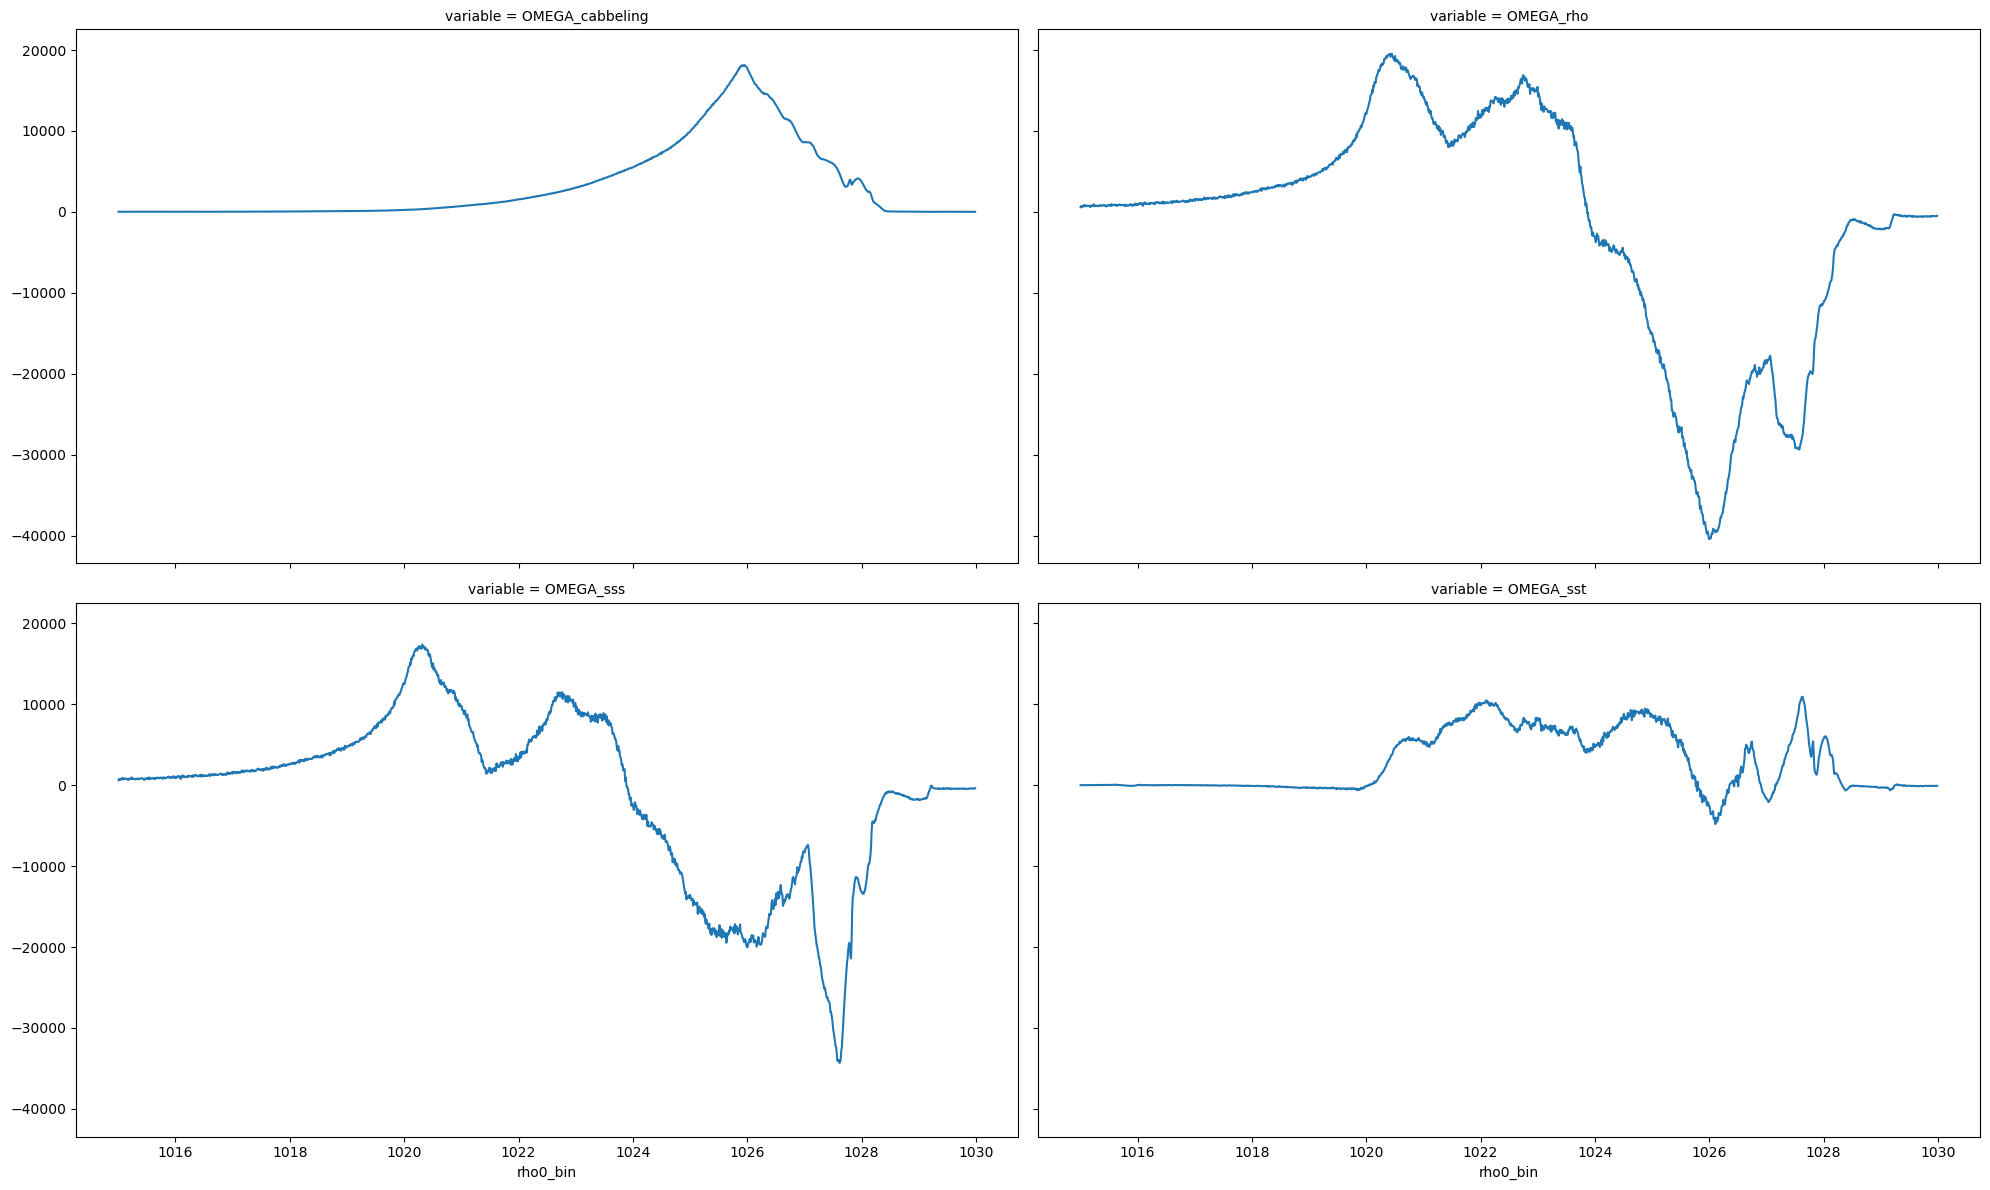

In [6]:
#instead of Sv (/1e6), it's m^2
(global_hist/1e4).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

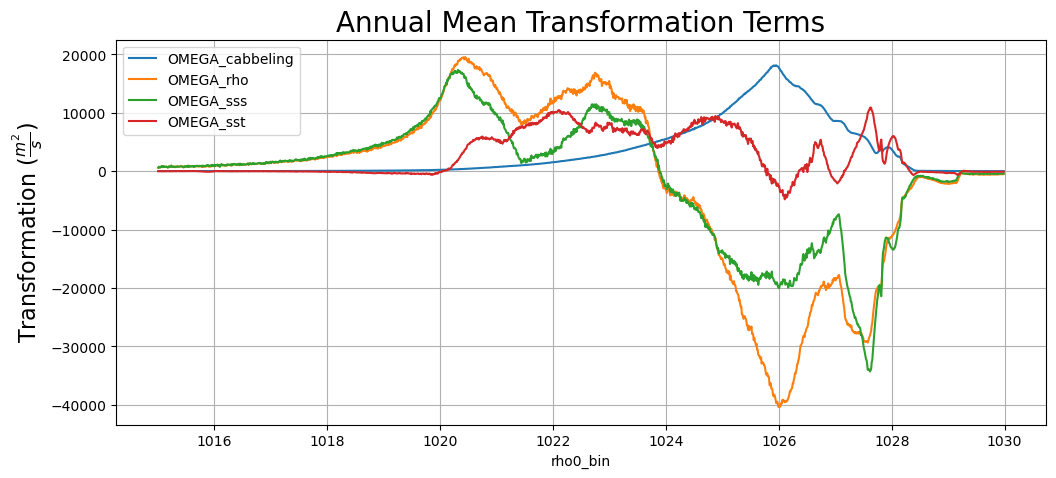

In [8]:
fig = plt.figure(figsize=(12,5))
for i in list(global_hist.data_vars):
    (global_hist[i].mean('time')/1e4).plot(label=f'{i}')
plt.legend()
plt.ylabel(r'Transformation ($\frac{m^2}{s}$)', fontsize=16)
plt.grid()
plt.title('Annual Mean Transformation Terms', fontsize=20);

## 1a) Annual-mean ATL fig
(use logarithmic scale on y-axis)

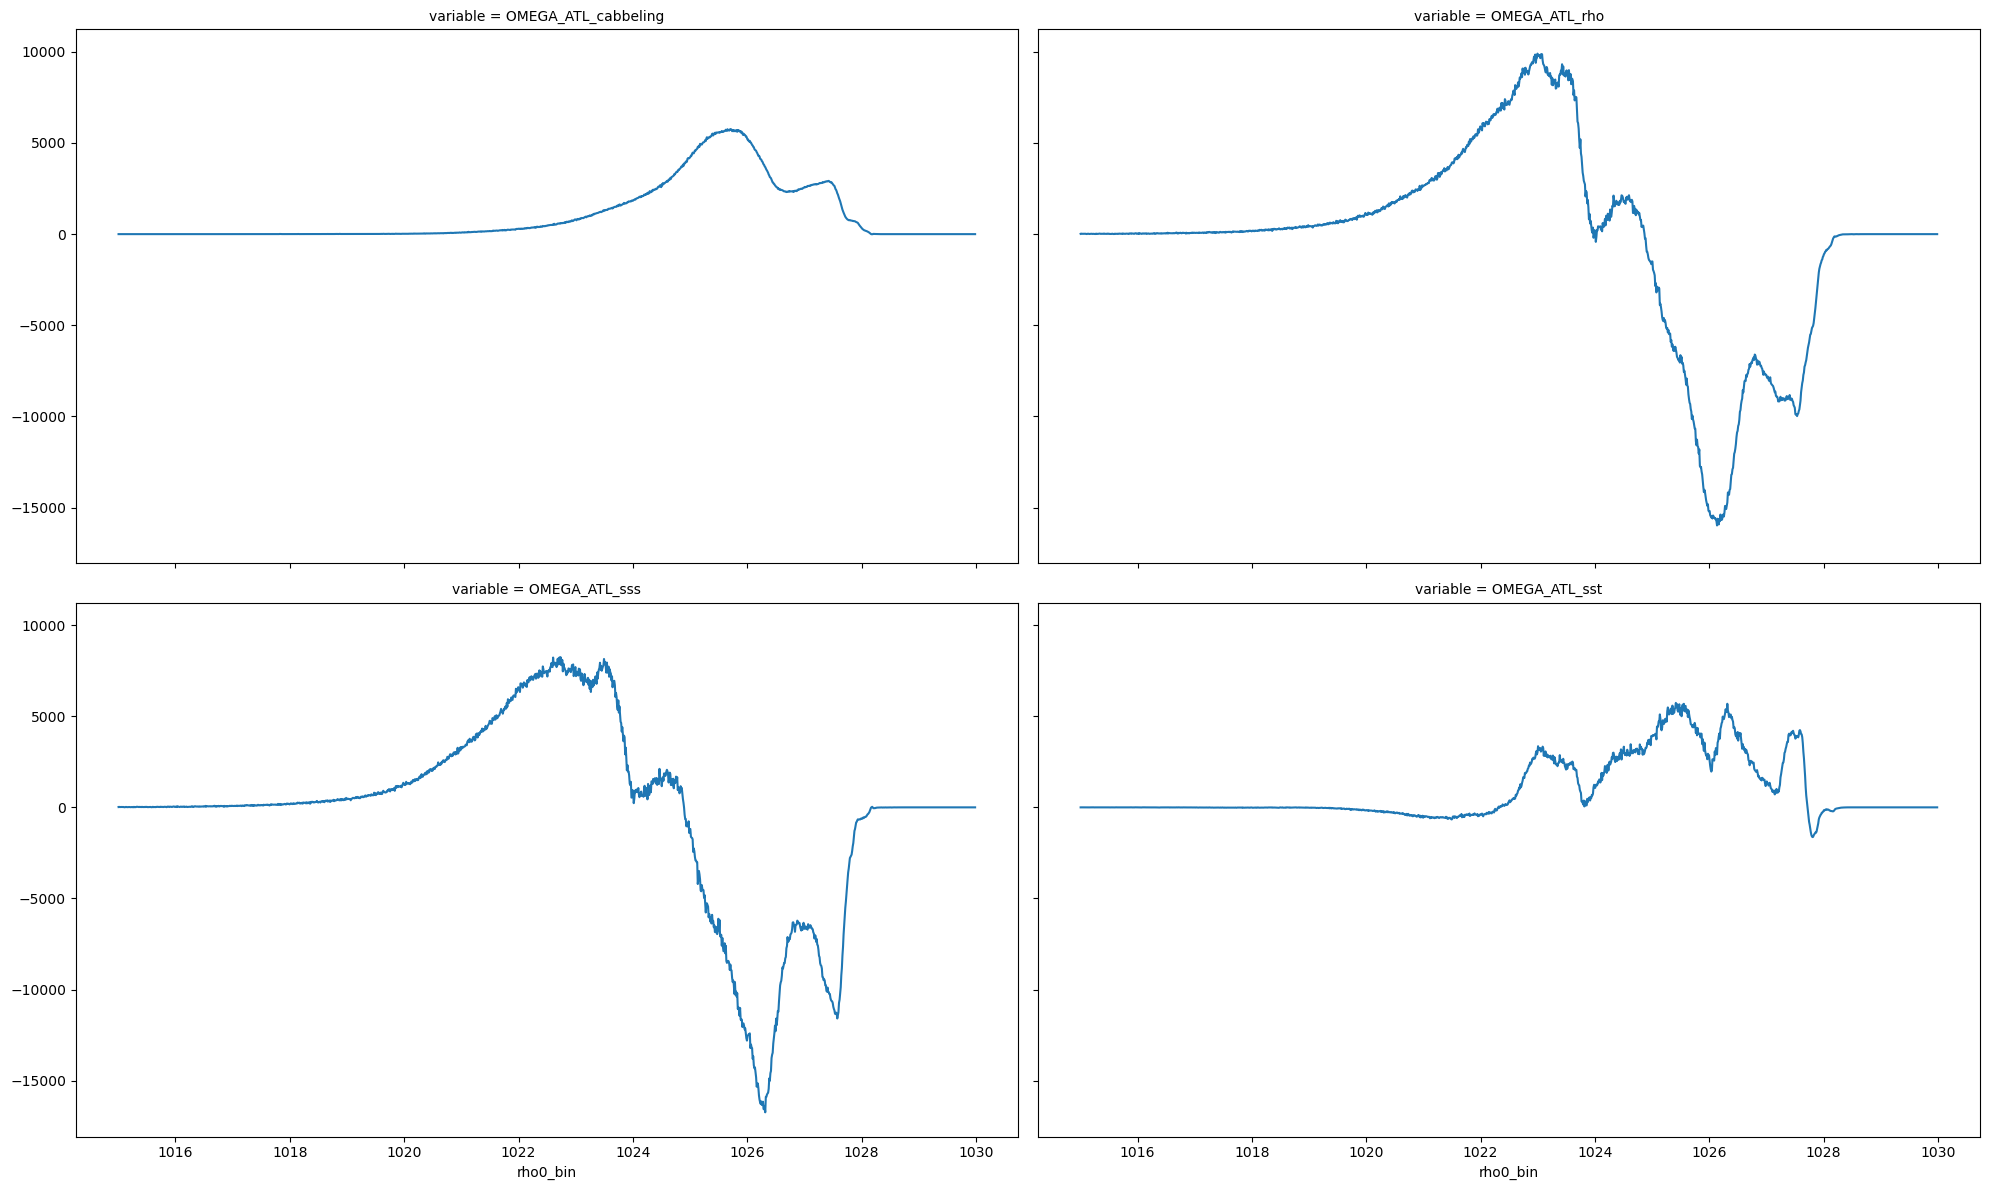

In [9]:
#instead of Sv (/1e6), it's m^2
(atl/1e4).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

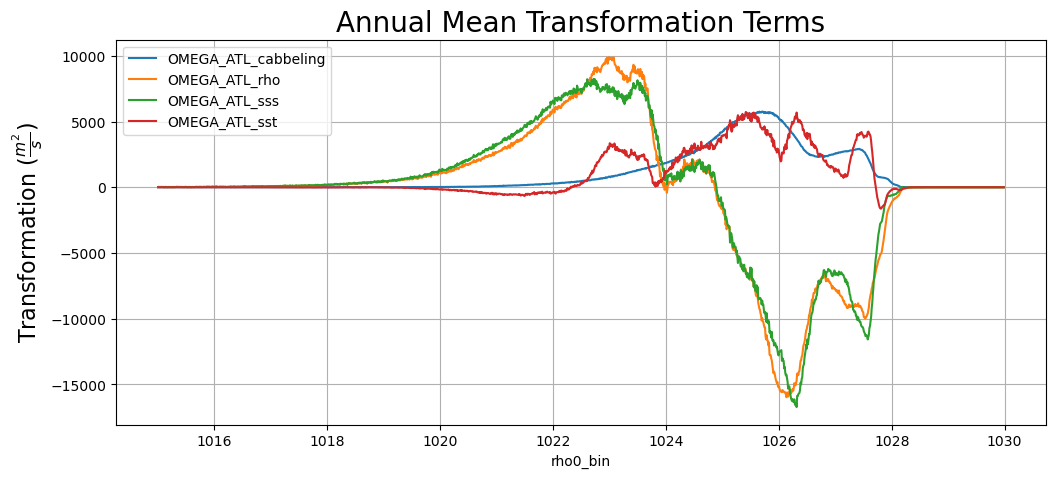

In [10]:
fig = plt.figure(figsize=(12,5))
for i in list(atl.data_vars):
    (atl[i].mean('time')/1e4).plot(label=f'{i}')
plt.legend()
plt.ylabel(r'Transformation ($\frac{m^2}{s}$)', fontsize=16)
plt.grid()
plt.title('Annual Mean Transformation Terms', fontsize=20);

## 1b) Annual-mean PAC fig
(use logarithmic scale on y-axis)

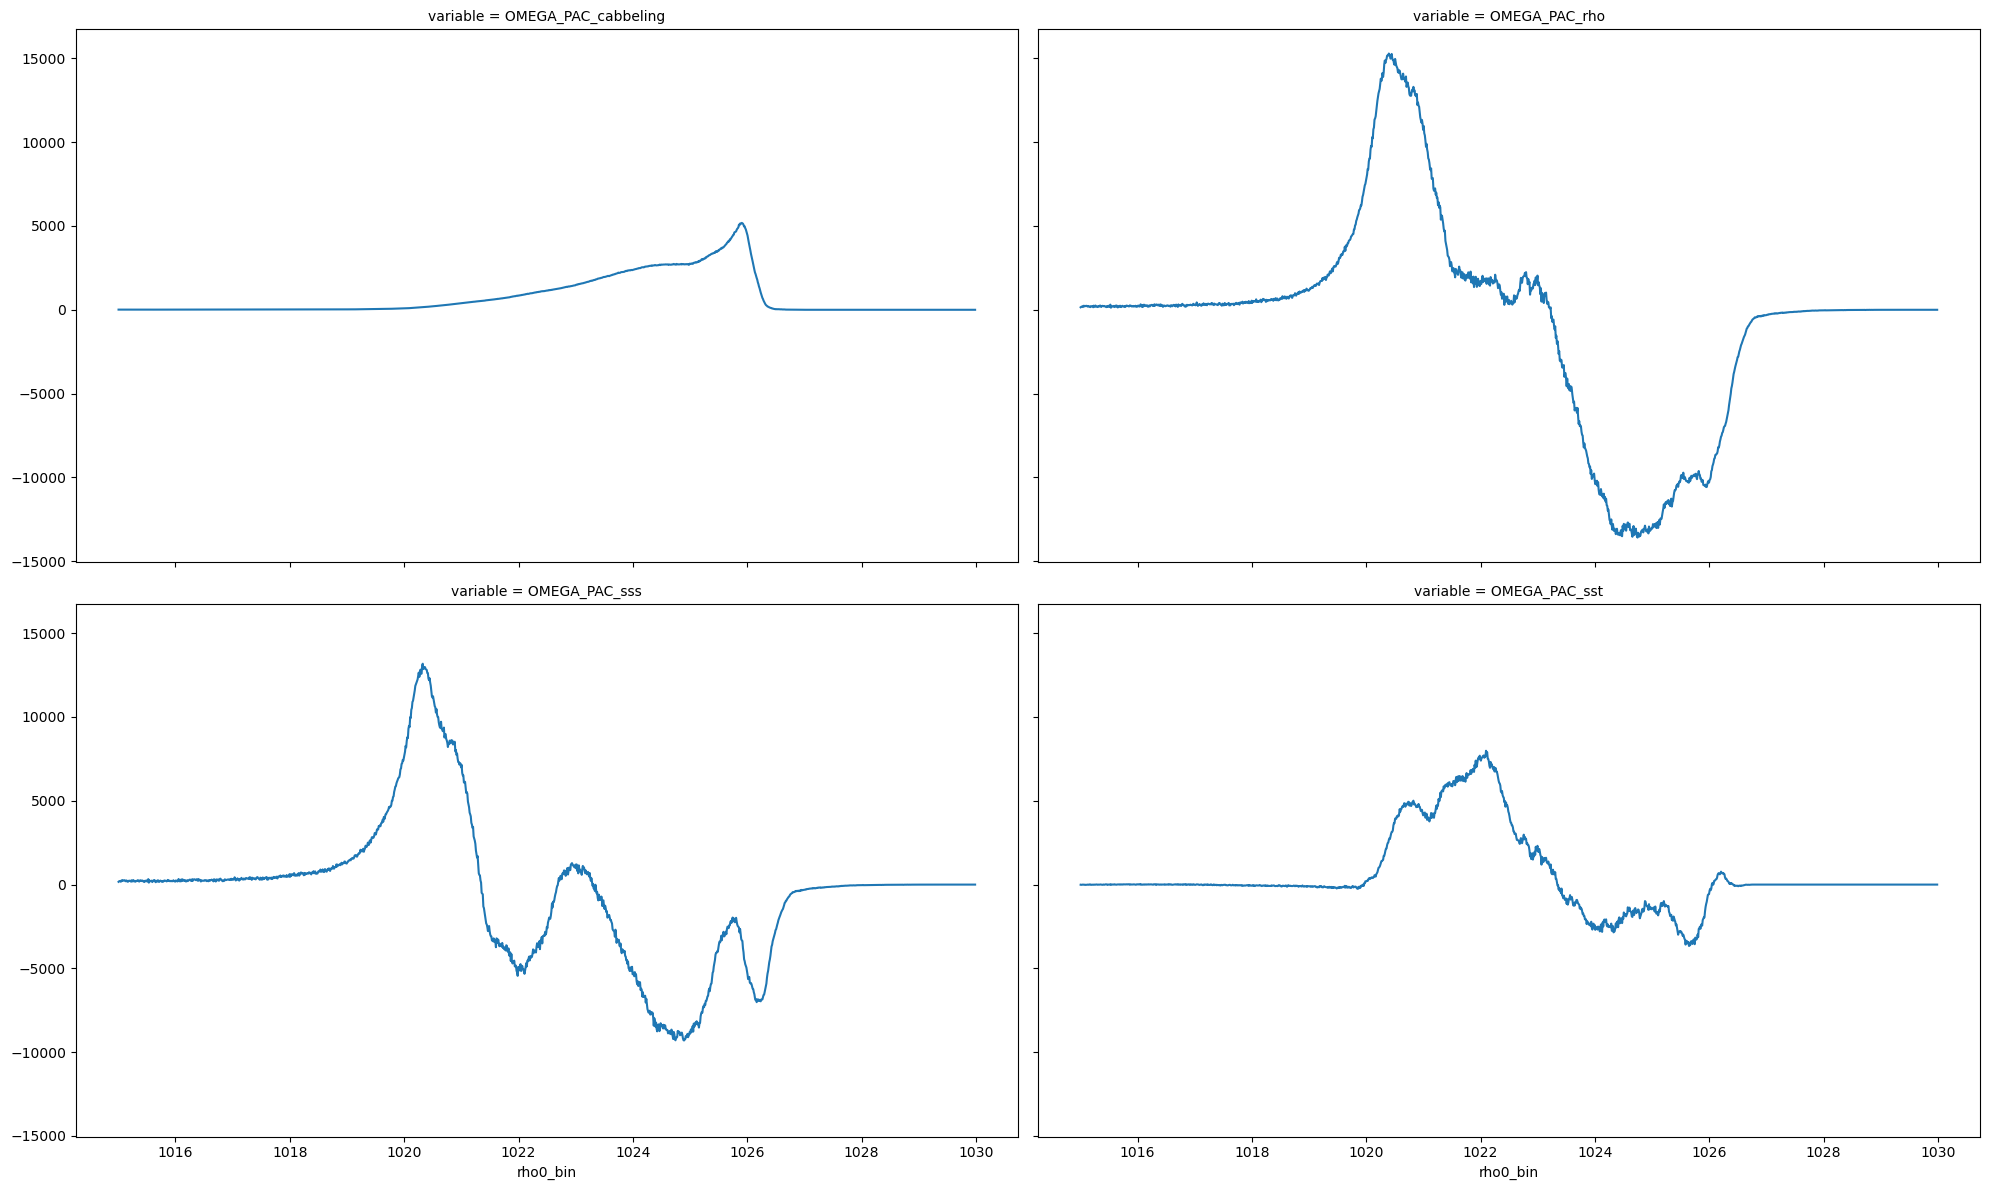

In [11]:
#instead of Sv (/1e6), it's m^2
(pac/1e4).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

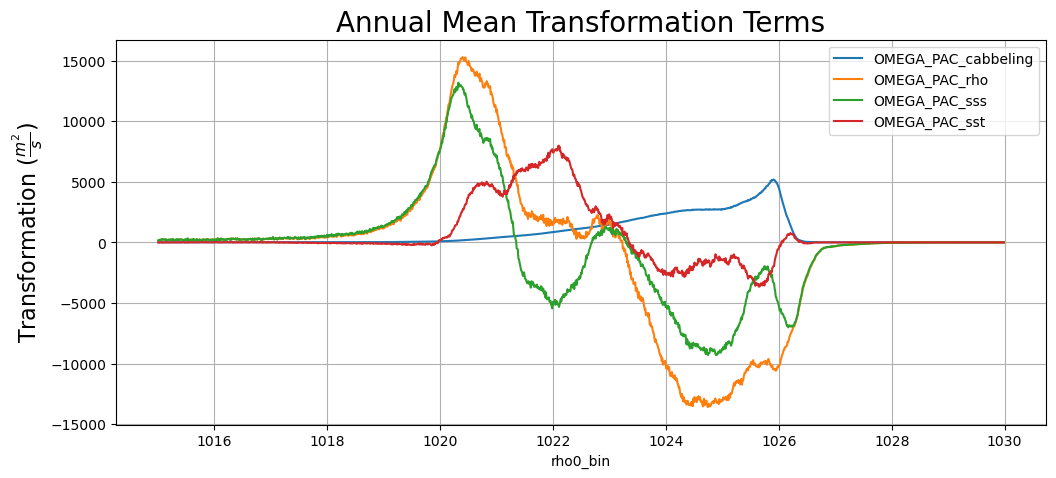

In [12]:
fig = plt.figure(figsize=(12,5))
for i in list(pac.data_vars):
    (pac[i].mean('time')/1e4).plot(label=f'{i}')
plt.legend()
plt.ylabel(r'Transformation ($\frac{m^2}{s}$)', fontsize=16)
plt.grid()
plt.title('Annual Mean Transformation Terms', fontsize=20);

## 1c) Annual-mean IND fig
(use logarithmic scale on y-axis)

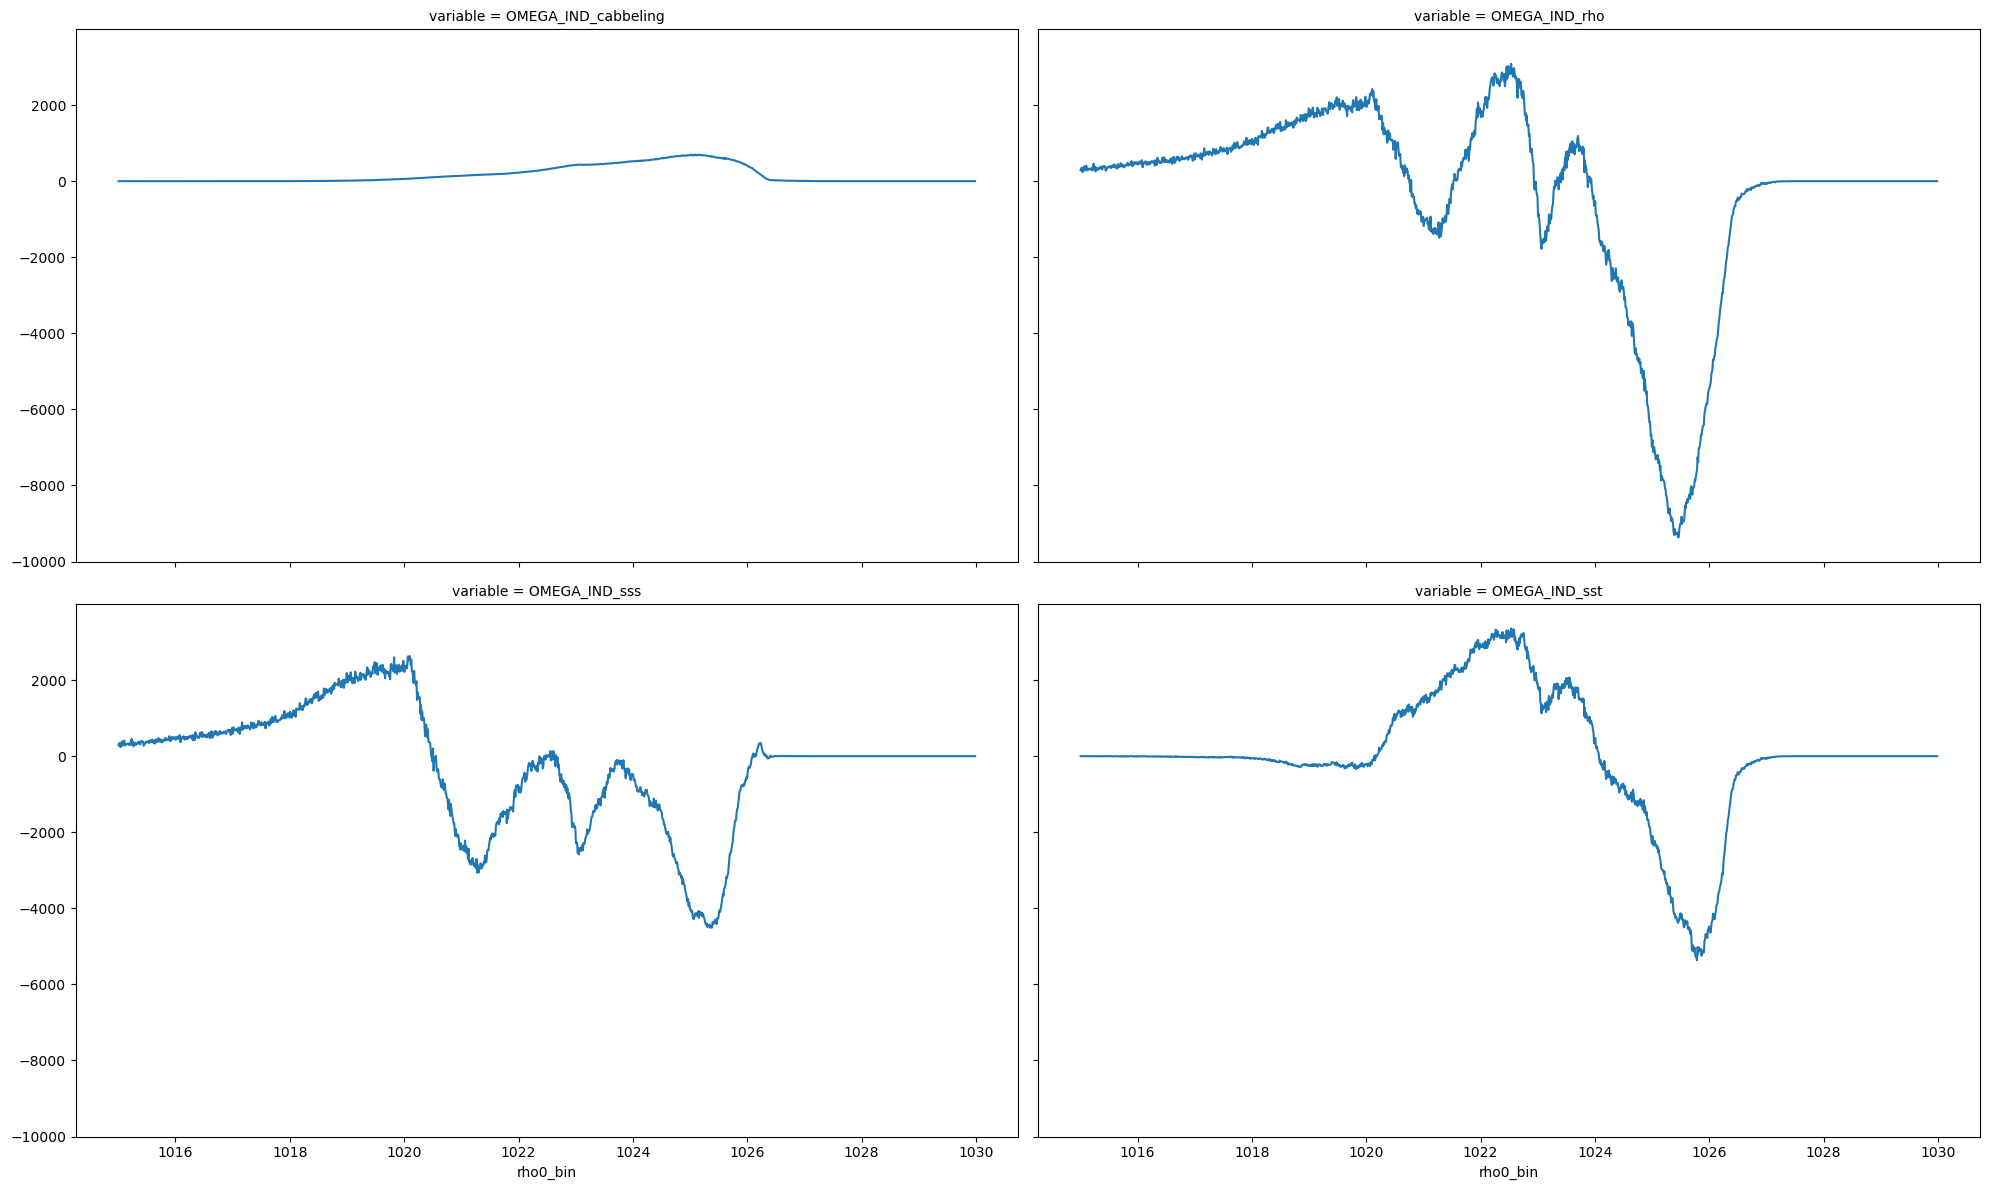

In [13]:
#instead of Sv (/1e6), it's m^2
(ind/1e4).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

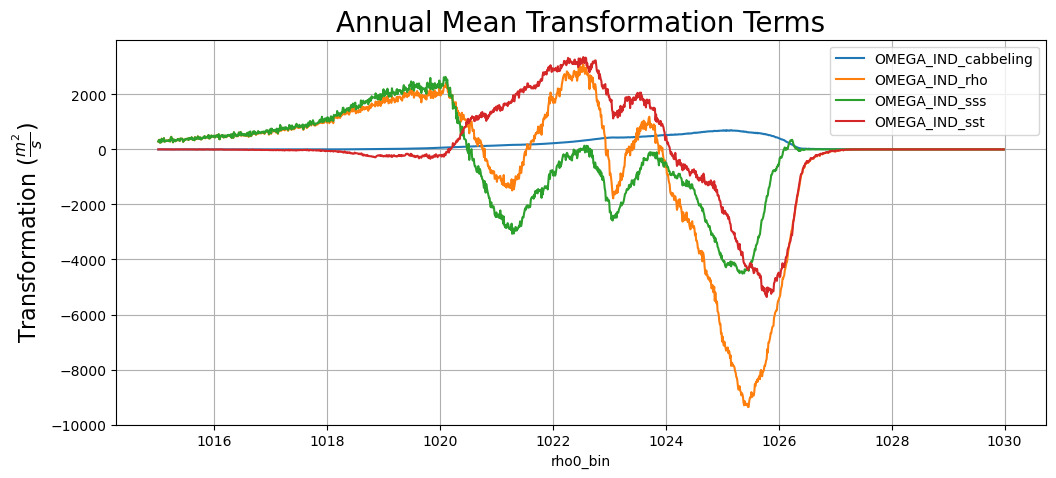

In [14]:
fig = plt.figure(figsize=(12,5))
for i in list(ind.data_vars):
    (ind[i].mean('time')/1e4).plot(label=f'{i}')
plt.legend()
plt.ylabel(r'Transformation ($\frac{m^2}{s}$)', fontsize=16)
plt.grid()
plt.title('Annual Mean Transformation Terms', fontsize=20);

## 1d) Annual-mean ARC fig
(use logarithmic scale on y-axis)

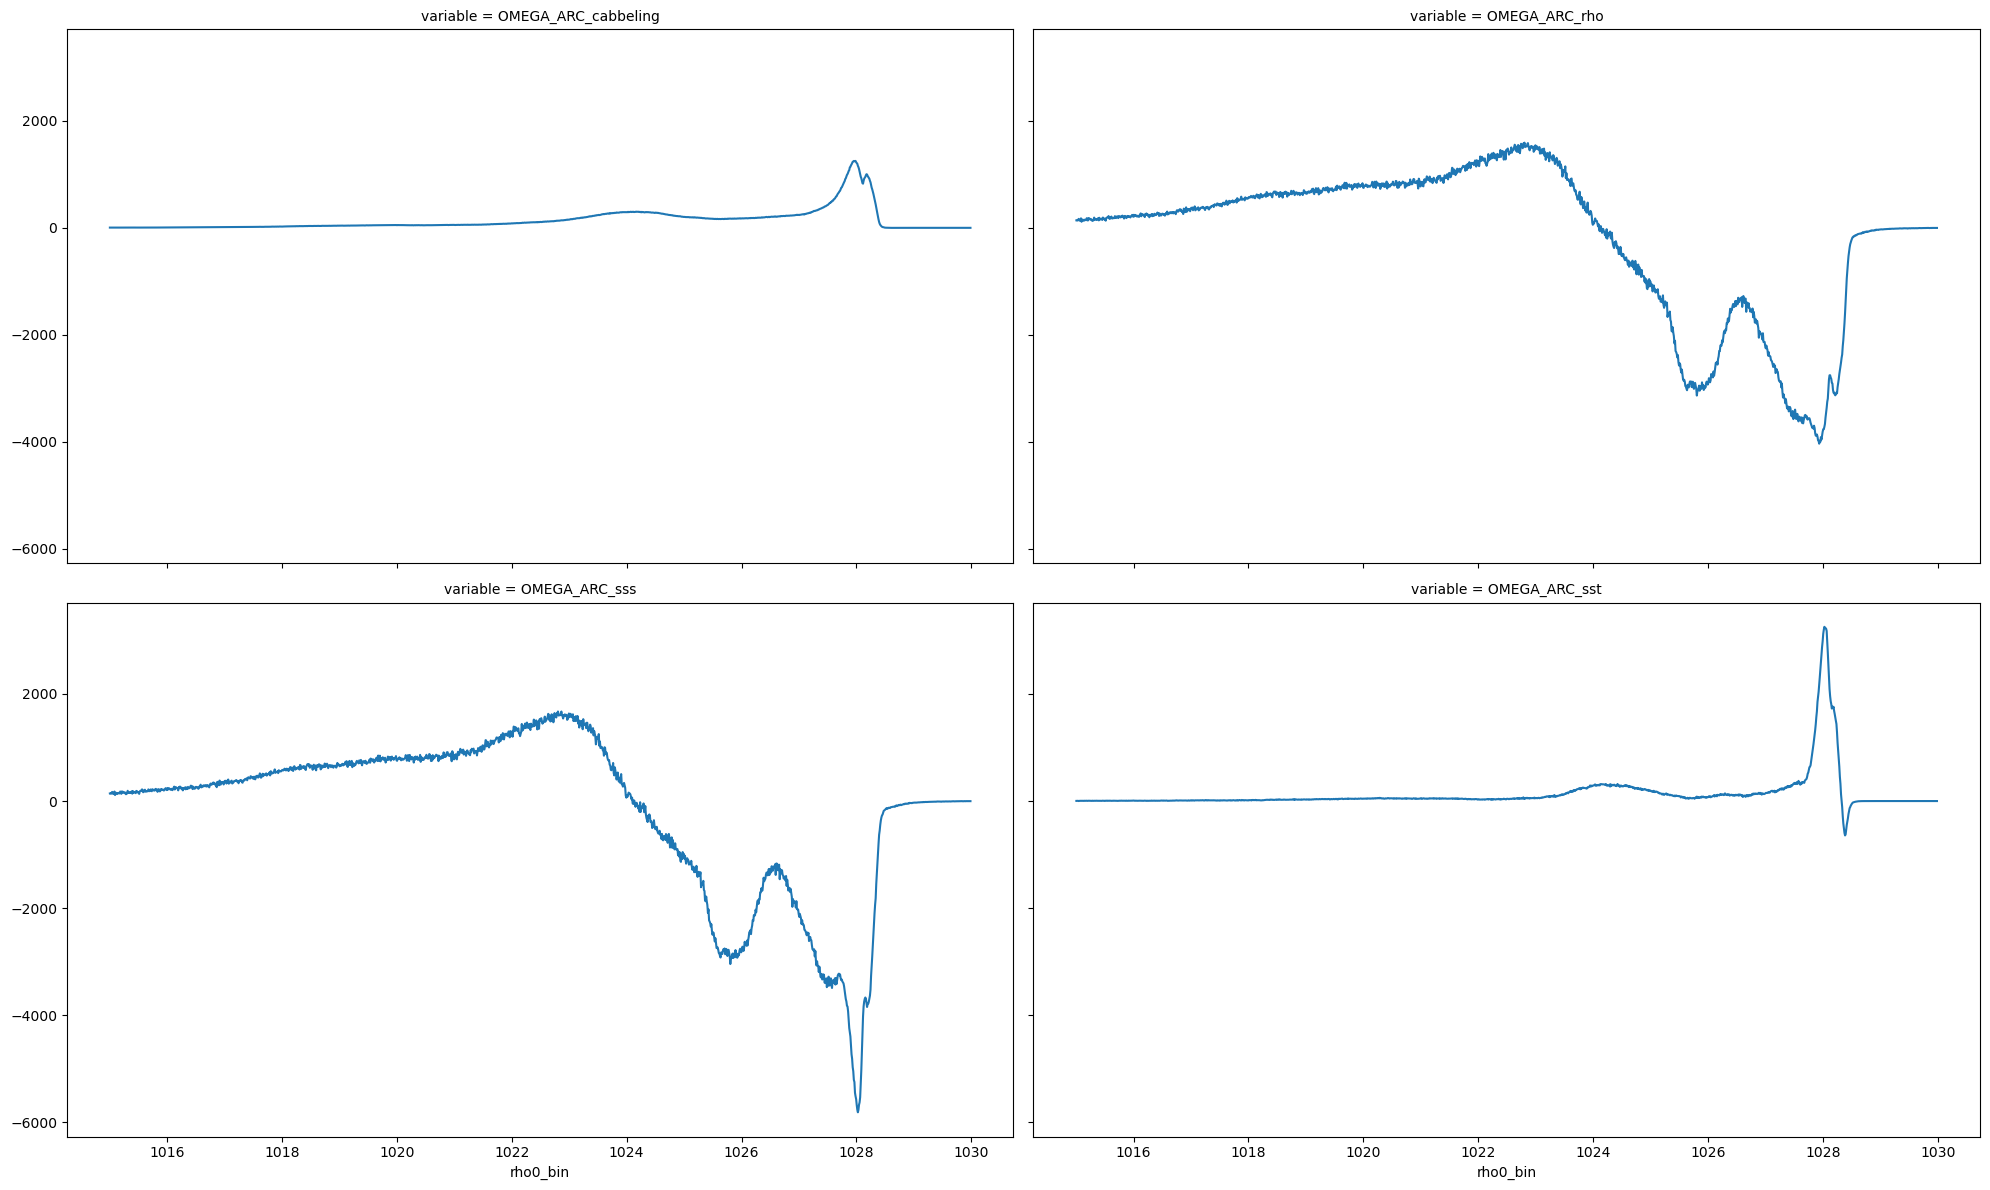

In [15]:
#instead of Sv (/1e6), it's m^2
(arc/1e4).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

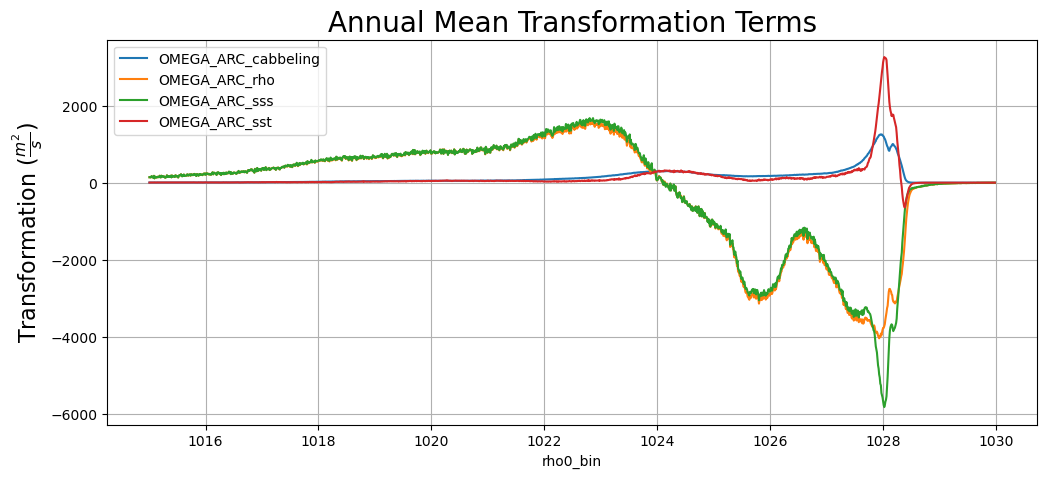

In [16]:
fig = plt.figure(figsize=(12,5))
for i in list(arc.data_vars):
    (arc[i].mean('time')/1e4).plot(label=f'{i}')
plt.legend()
plt.ylabel(r'Transformation ($\frac{m^2}{s}$)', fontsize=16)
plt.grid()
plt.title('Annual Mean Transformation Terms', fontsize=20);

## 1e) Annual-mean South fig
(use logarithmic scale on y-axis)

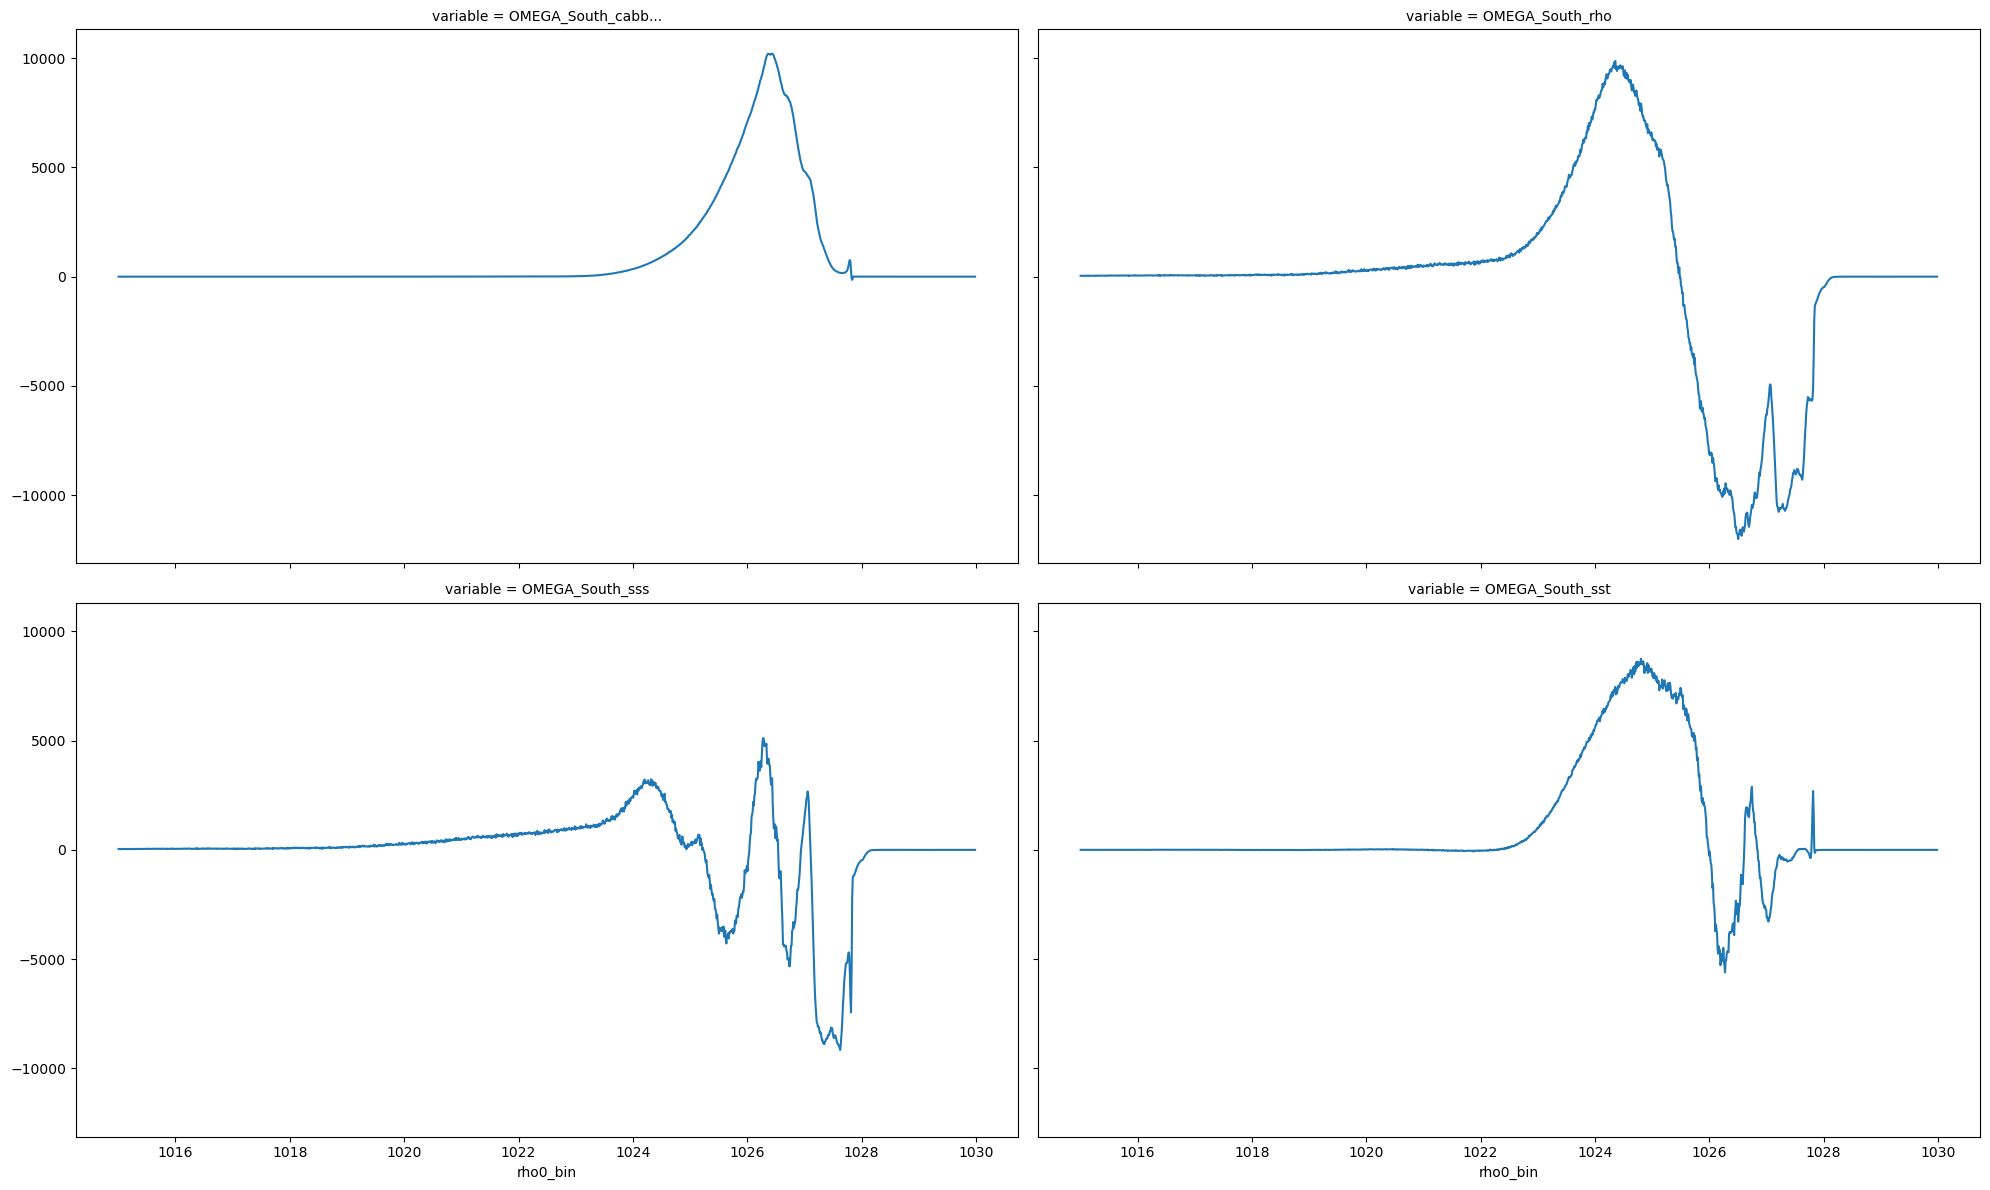

In [5]:
#instead of Sv (/1e6), it's m^2
(south/1e4).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

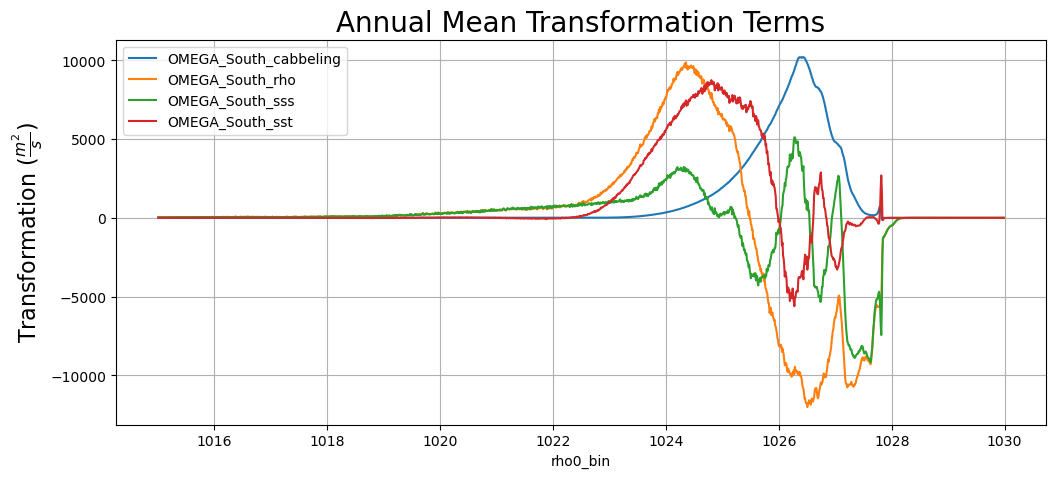

In [6]:
fig = plt.figure(figsize=(12,5))
for i in list(south.data_vars):
    (south[i].mean('time')/1e4).plot(label=f'{i}')
plt.legend()
plt.ylabel(r'Transformation ($\frac{m^2}{s}$)', fontsize=16)
plt.grid()
plt.title('Annual Mean Transformation Terms', fontsize=20);

# 2) Global timeseries fig <a class='anchor' id='second-bullet'> </a>

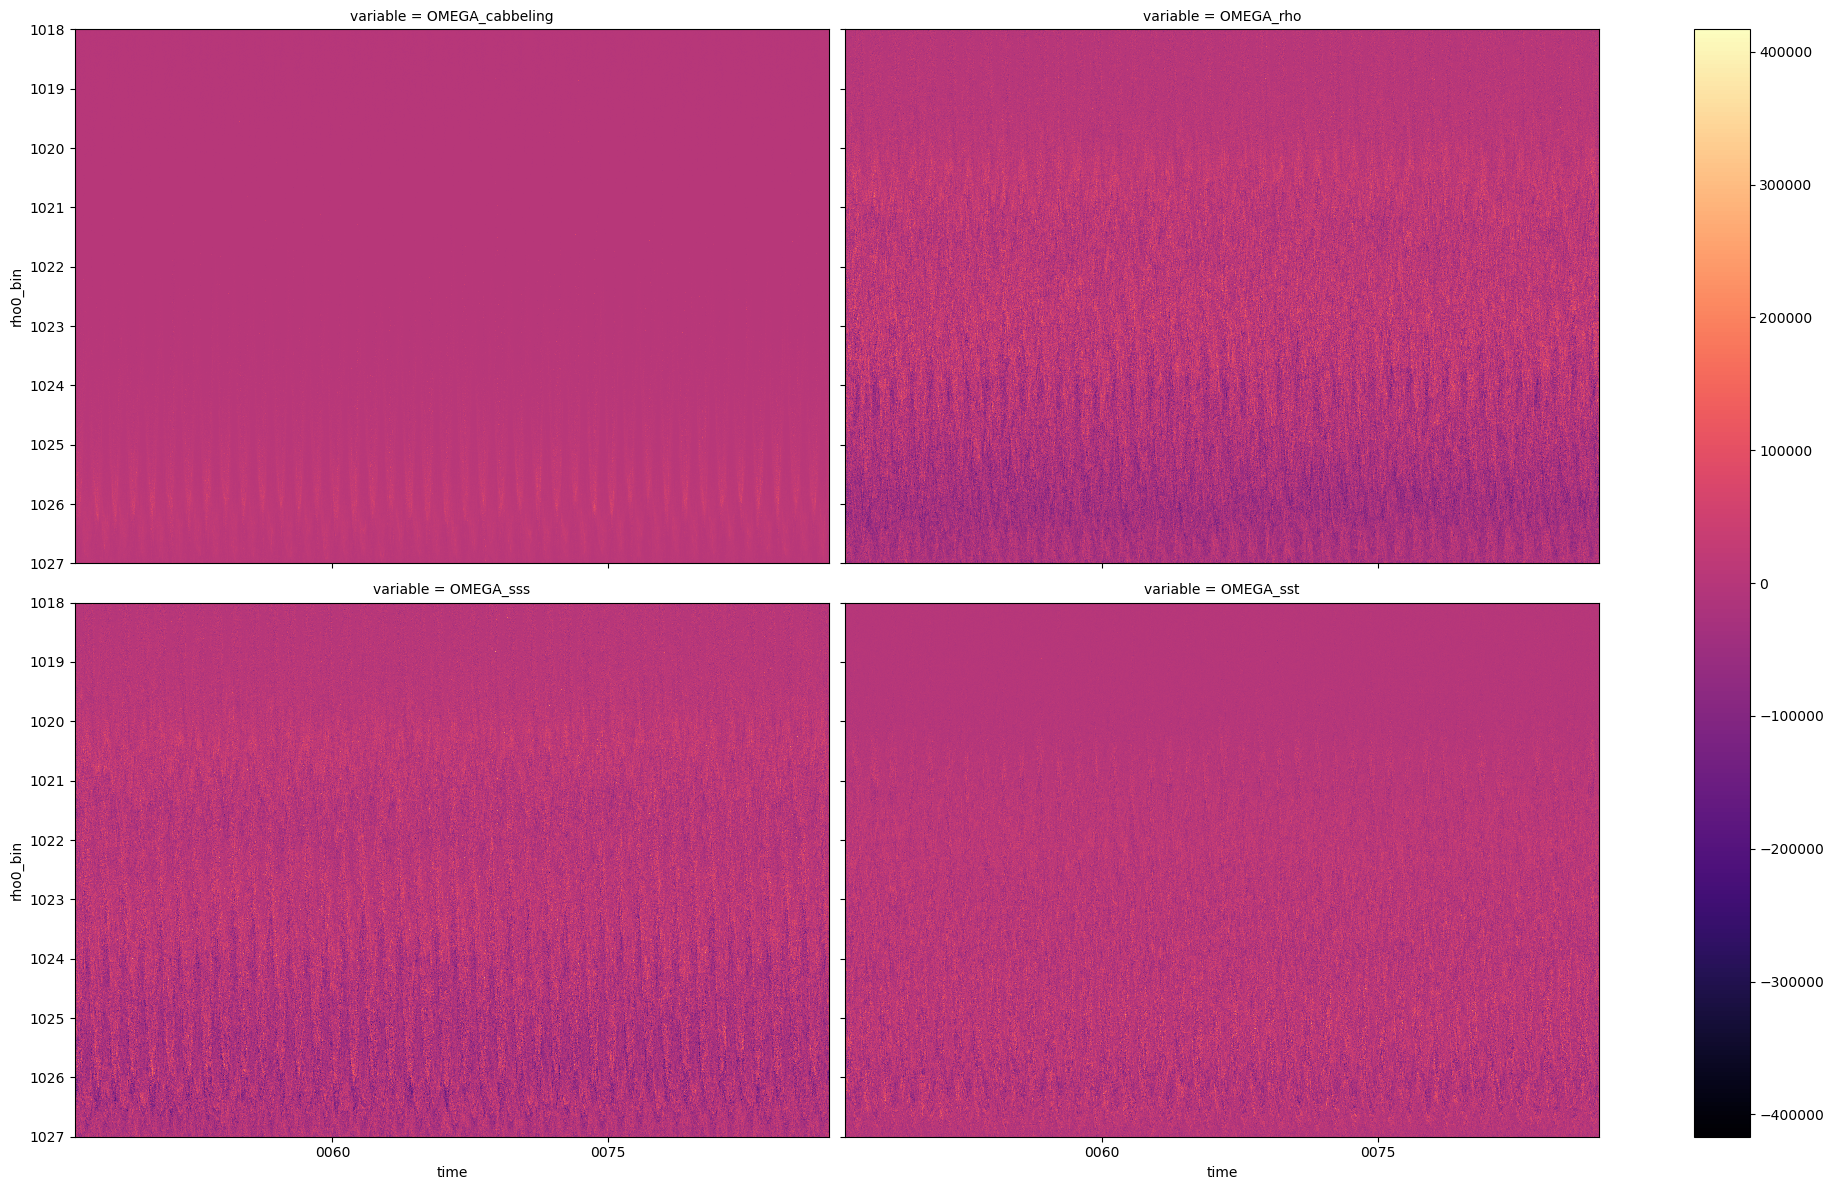

In [7]:
#instead of Sv (/1e6) it's m^2/s
(global_hist/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018);

## 2a) ATL timeseries fig 

In [8]:
#instead of Sv (/1e6) it's m^2/s
(atl/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Atlantic Ocean');

KeyboardInterrupt: 

## 2b) PAC timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(pac/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Pacific Ocean');

## 2c) IND timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(ind/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Indian Ocean');

## 2d) ARC timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(arc/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Arctic Ocean');

## 2e) South timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(south/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Southern Ocean');

# 3) Global Monthly Climatology <a class='anchor' id='third-bullet'> </a>

In [6]:
def anomaly(da):
    def clim(da):
        clim = da.groupby('time.month').mean(dim='time')
        return clim
    
    clim = clim(da) / 1e6
    anom = (da.groupby('time.month') - clim) / 1e6
    #anom_chunk = anom.chunk({'time':-1, 'sigma2_bin':-1})
    #anom_rolled = anom.rolling(time=36, center=True).mean(dim='time') #annual rolling mean to remove seasonal cycle
    return (clim, anom)

In [7]:
clim_global = anomaly(global_hist)[0]
anom_global = anomaly(global_hist)[1]

clim_atl = anomaly(atl)[0]
anom_atl = anomaly(atl)[1]
clim_pac = anomaly(pac)[0]
anom_pac = anomaly(pac)[1]
clim_ind = anomaly(ind)[0]
anom_ind = anomaly(ind)[1]
clim_arc = anomaly(arc)[0]
anom_arc = anomaly(arc)[1]
clim_south = anomaly(south)[0]
anom_south = anomaly(south)[1]

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 42 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 42 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 42 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 42 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 42 times more chunks
  return self.array[key]
/srv/

In [7]:
def plotting_global(ds, scale):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    levels = np.arange(-100, 100) + 10

    ds.OMEGA_rho.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,0])
    axes[0,0].set_title(r'Density ($\rho_0$)')
    axes[0,0].set_ylim(1029, 1018)
    axes[0,0].grid()

    ds.OMEGA_cabbeling.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,1])
    axes[0,1].set_title('Cabbeling')
    axes[0,1].set_ylim(1029, 1018)
    axes[0,1].grid()

    ds.OMEGA_sst.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,0])
    axes[1,0].set_title('SST')
    axes[1,0].set_ylim(1029, 1018)
    axes[1,0].grid()

    ds.OMEGA_sss.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,1])
    axes[1,1].set_title('SSS')
    axes[1,1].set_ylim(1029, 1018)
    axes[1,1].grid()

    plt.suptitle(f'{scale} transformation due to ...', fontsize=20, y=1)
    plt.tight_layout();

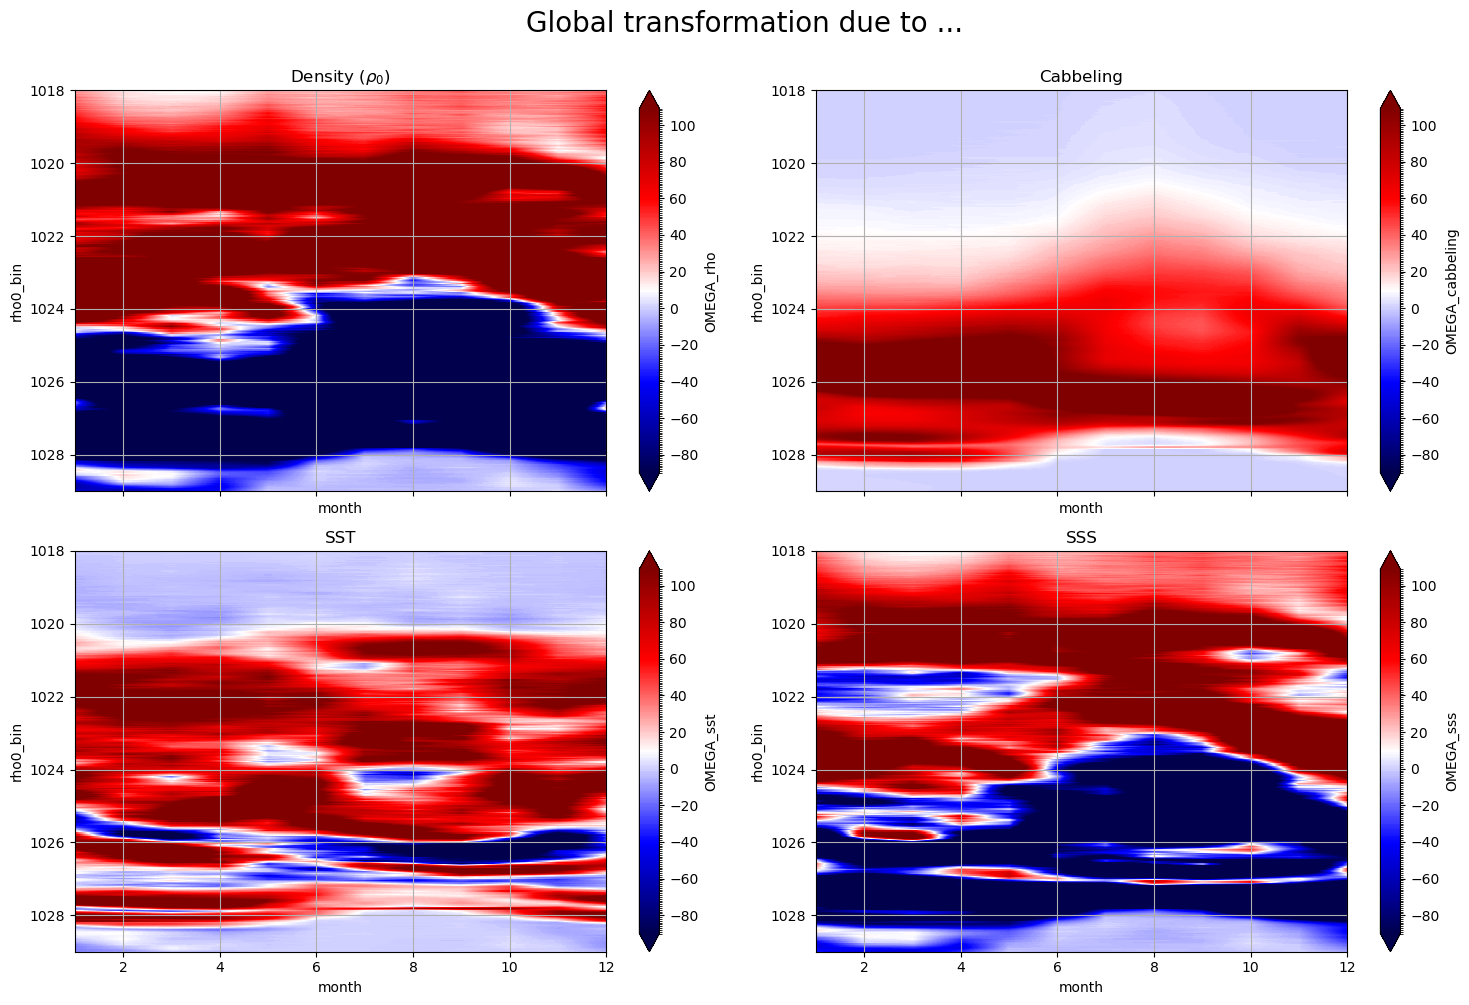

In [62]:
plotting_global(clim_global, 'Global')

## 3a) ATL monthly climatology

In [8]:
def plotting(ds, prefix, scale):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    levels = np.arange(-100, 100) + 10

    ds[f'OMEGA_{prefix}rho'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,0])
    axes[0,0].set_title(r'Density ($\rho_0$)')
    axes[0,0].set_ylim(1029, 1018)
    axes[0,0].grid()

    ds[f'OMEGA_{prefix}cabbeling'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,1])
    axes[0,1].set_title('Cabbeling')
    axes[0,1].set_ylim(1029, 1018)
    axes[0,1].grid()

    ds[f'OMEGA_{prefix}sst'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,0])
    axes[1,0].set_title('SST')
    axes[1,0].set_ylim(1029, 1018)
    axes[1,0].grid()

    ds[f'OMEGA_{prefix}sss'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,1])
    axes[1,1].set_title('SSS')
    axes[1,1].set_ylim(1029, 1018)
    axes[1,1].grid()

    plt.suptitle(f'{scale} transformation due to ...', fontsize=20, y=1)
    plt.tight_layout();

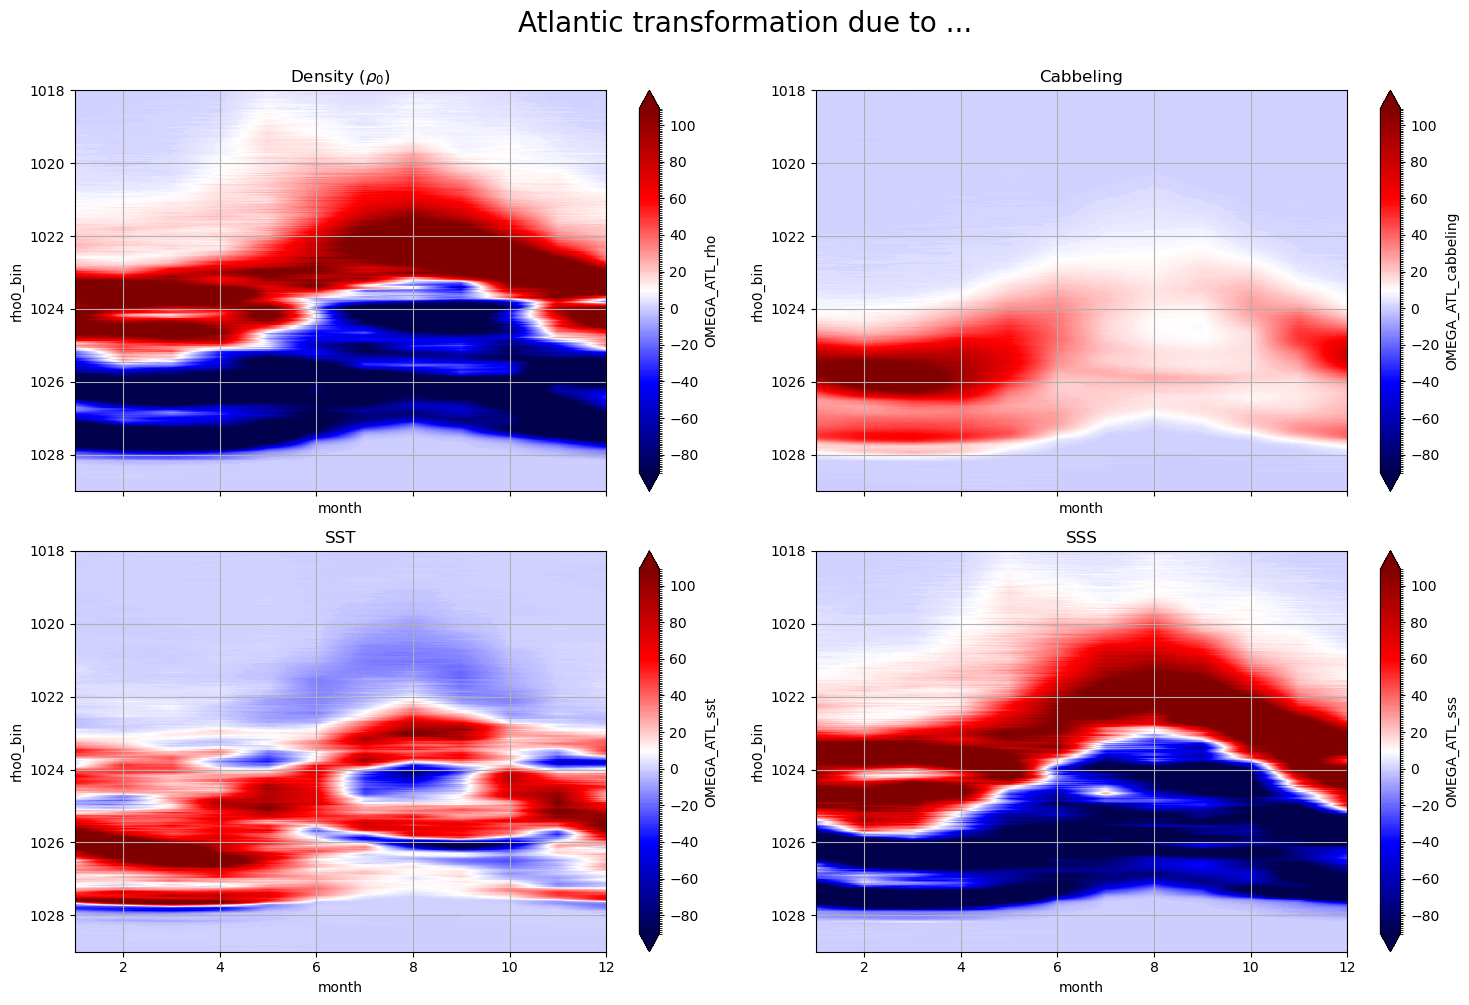

In [64]:
plotting(clim_atl, 'ATL_', 'Atlantic')

## 3b) PAC monthly climatology

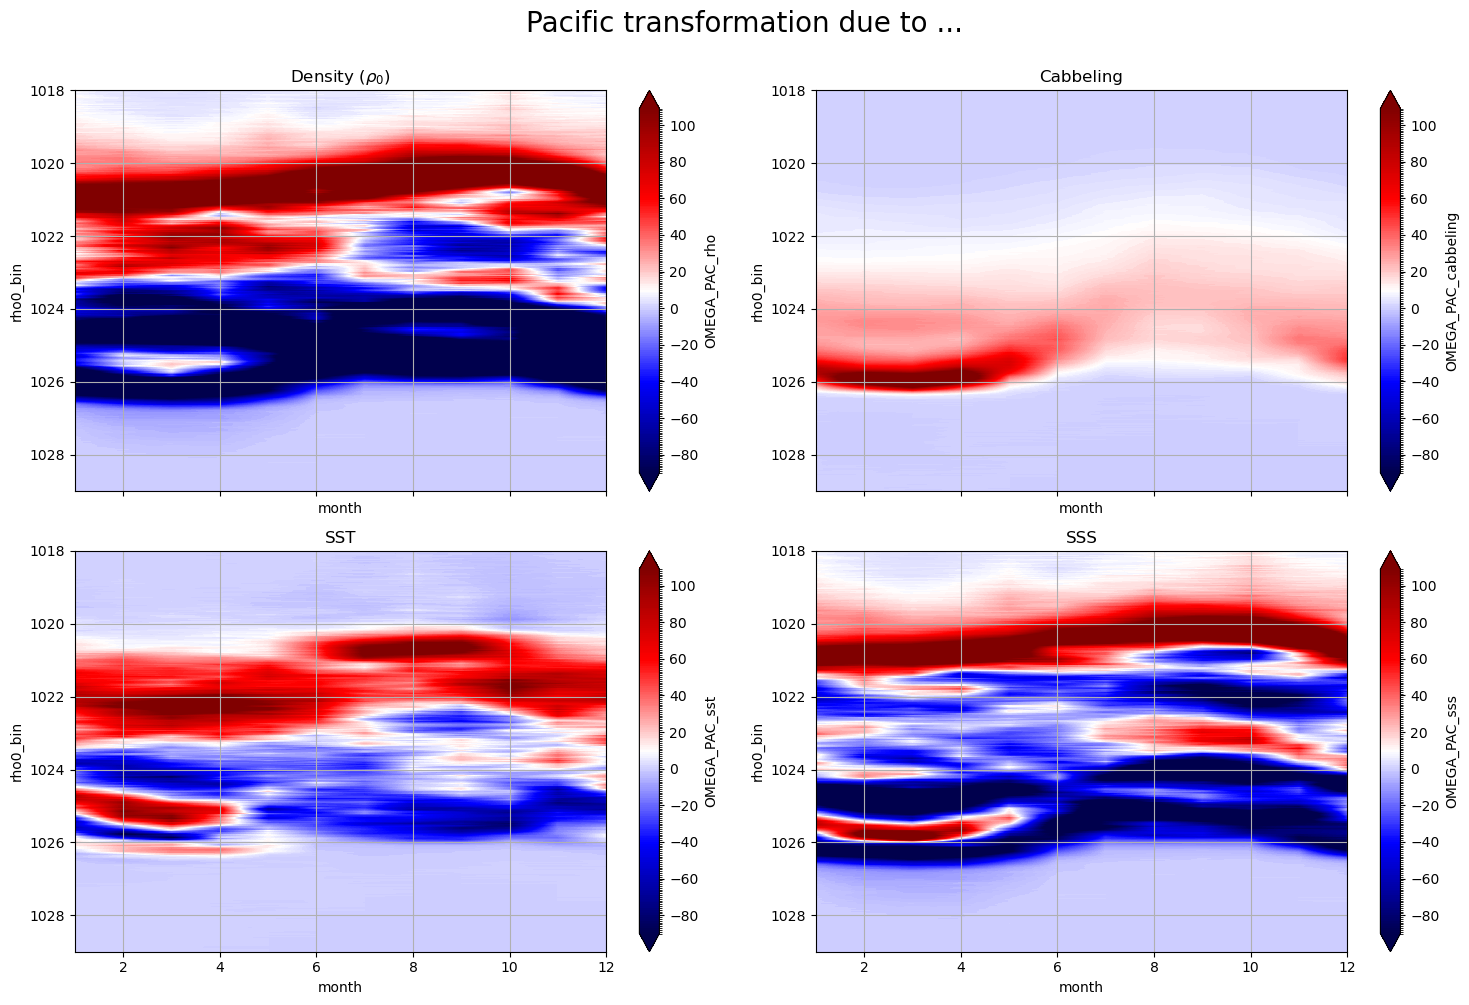

In [66]:
plotting(clim_pac, 'PAC_', 'Pacific')

## 3c) IND monthly climatology

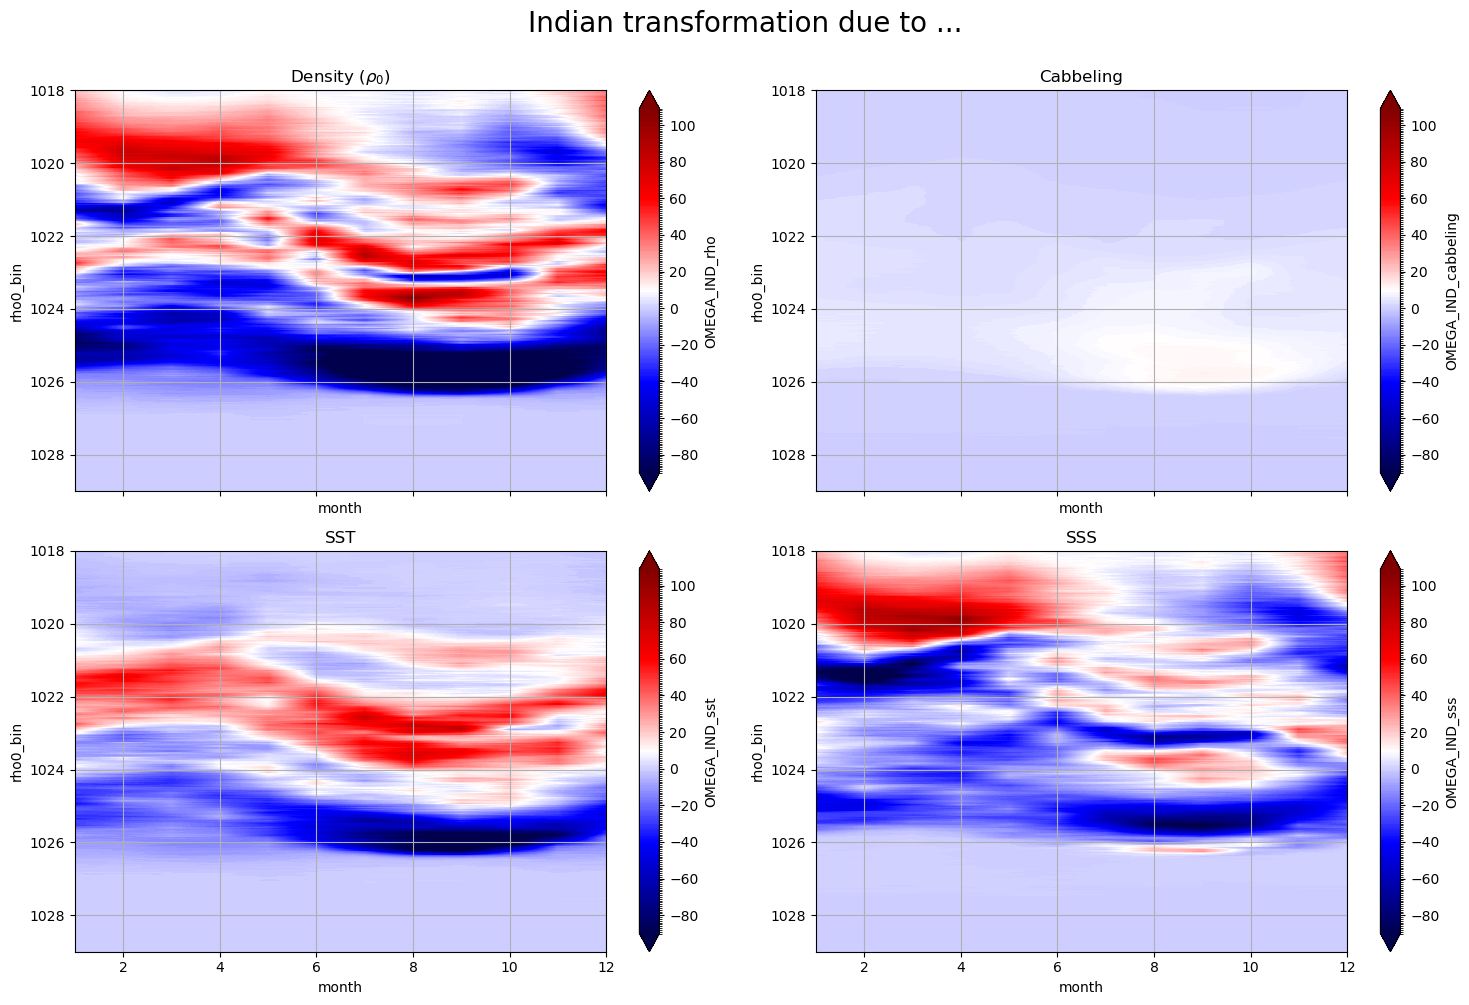

In [68]:
plotting(clim_ind, 'IND_', 'Indian')

## 3d) ARC monthly climatology

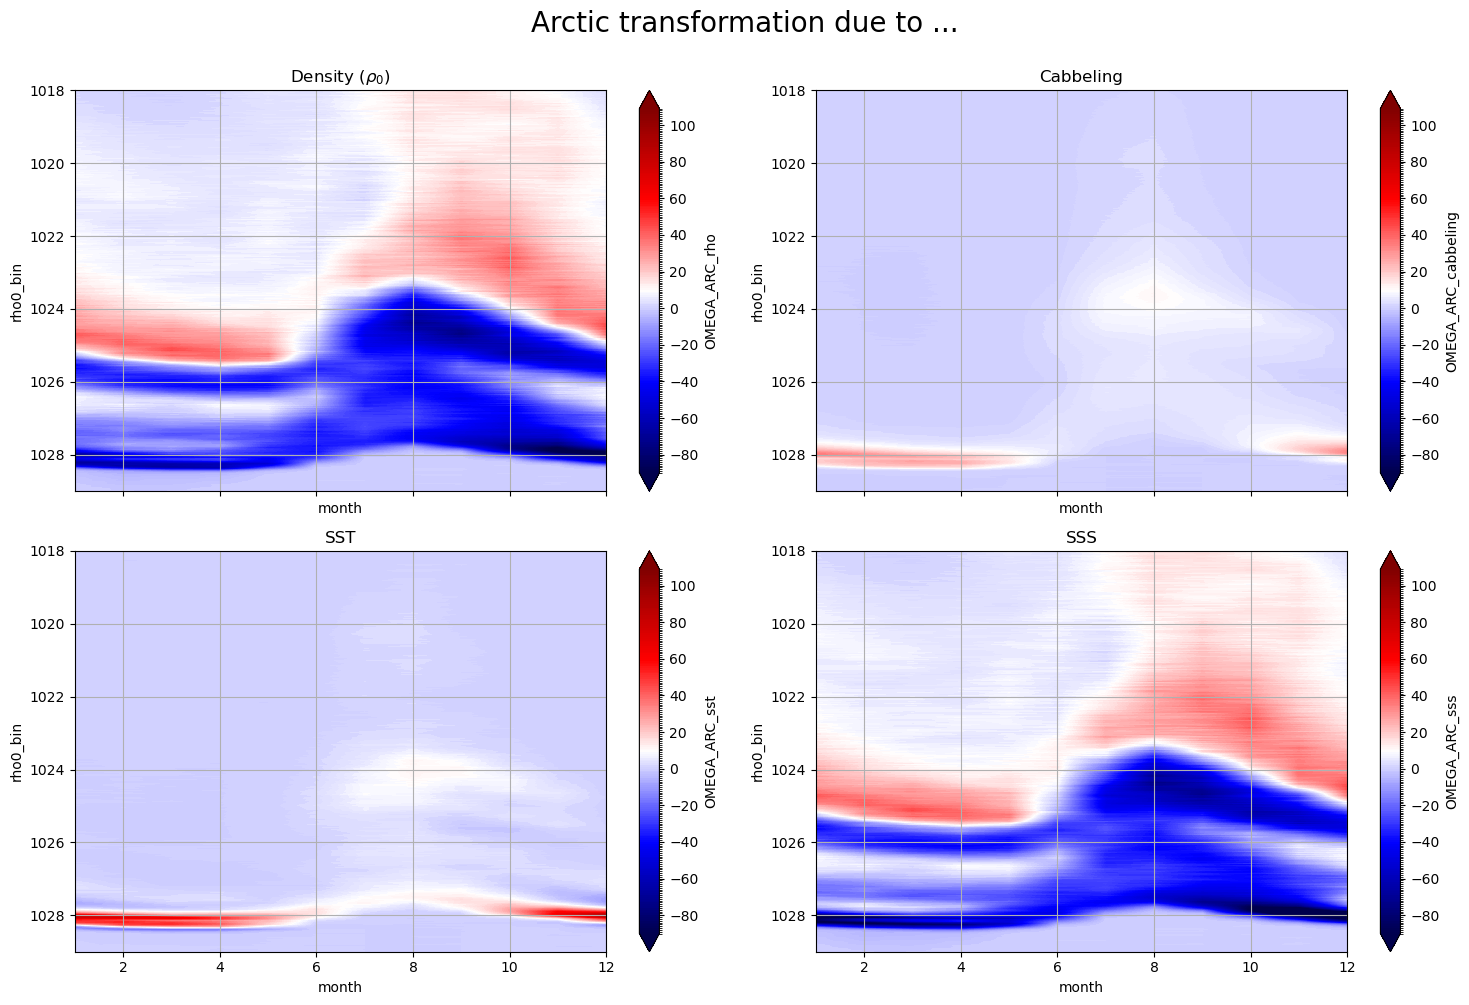

In [69]:
plotting(clim_arc, 'ARC_', 'Arctic')

## 3e) South monthly climatology

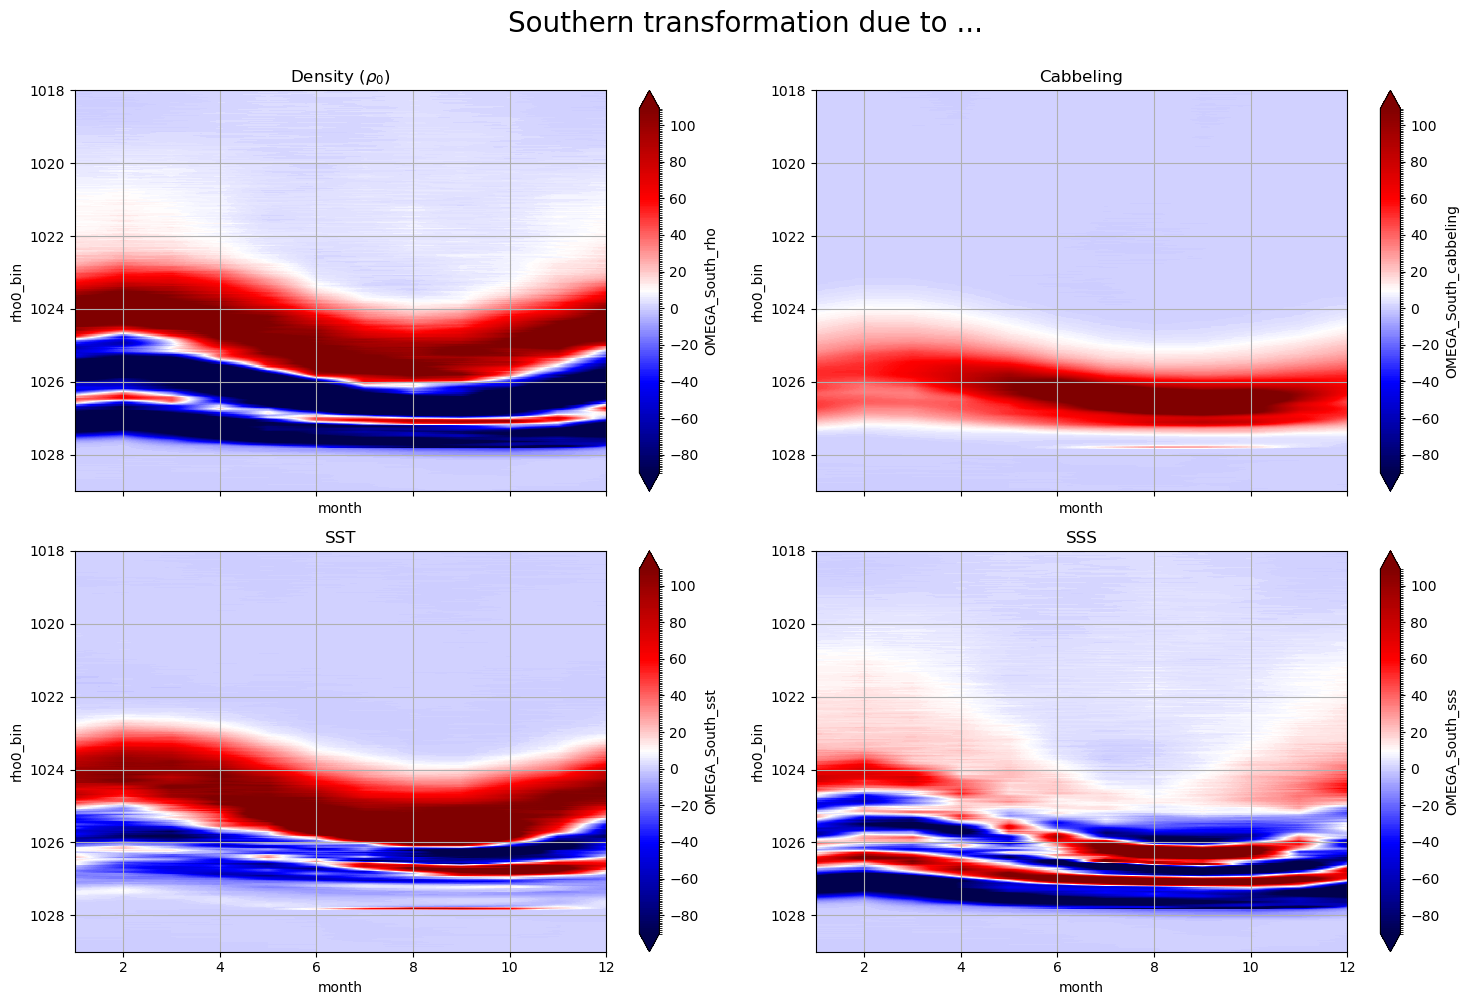

In [70]:
plotting(clim_south, 'South_', 'Southern')

# 4) Global Anomaly <a class='anchor' id='fourth-bullet'> </a>

In [7]:
def plotting_global(ds, scale):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    levels = np.arange(-10, 10) + 10

    ds.OMEGA_rho.plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[0,0])
    axes[0,0].set_title(r'Density ($\rho_0$)')
    axes[0,0].set_ylim(1029, 1018)
    axes[0,0].grid()

    ds.OMEGA_cabbeling.plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[0,1])
    axes[0,1].set_title('Cabbeling')
    axes[0,1].set_ylim(1029, 1018)
    axes[0,1].grid()

    ds.OMEGA_sst.plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[1,0])
    axes[1,0].set_title('SST')
    axes[1,0].set_ylim(1029, 1018)
    axes[1,0].grid()

    ds.OMEGA_sss.plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[1,1])
    axes[1,1].set_title('SSS')
    axes[1,1].set_ylim(1029, 1018)
    axes[1,1].grid()

    plt.suptitle(f'{scale} transformation due to ...', fontsize=20, y=1)
    plt.tight_layout();

In [10]:
anom_global = anom_global.drop('month')

In [ ]:
plotting_global(anom_global, 'Global')

## 4a) ATL Anomaly

In [ ]:
def plotting_anom(ds, prefix, scale):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    levels = np.arange(-100, 100) + 10

    ds[f'OMEGA_{prefix}rho'].plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[0,0])
    axes[0,0].set_title(r'Density ($\rho_0$)')
    axes[0,0].set_ylim(1029, 1018)
    axes[0,0].grid()

    ds[f'OMEGA_{prefix}cabbeling'].plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[0,1])
    axes[0,1].set_title('Cabbeling')
    axes[0,1].set_ylim(1029, 1018)
    axes[0,1].grid()

    ds[f'OMEGA_{prefix}sst'].plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[1,0])
    axes[1,0].set_title('SST')
    axes[1,0].set_ylim(1029, 1018)
    axes[1,0].grid()

    ds[f'OMEGA_{prefix}sss'].plot.contourf(x='time', cmap='seismic', levels=levels, extend='both', ax=axes[1,1])
    axes[1,1].set_title('SSS')
    axes[1,1].set_ylim(1029, 1018)
    axes[1,1].grid()

    plt.suptitle(f'{scale} transformation due to ...', fontsize=20, y=1)
    plt.tight_layout();

In [ ]:
plotting_anom(anom_atl, 'ATL_', 'Atlantic')

## 4b) PAC Anomaly

In [ ]:
plotting_anom(anom_pac, 'PAC_', 'Pacific')

## 4c) IND Anomaly

In [ ]:
plotting_anom(anom_ind, 'IND_', 'Indian')

## 4d) ARC Anomaly

In [ ]:
plotting_anom(anom_arc, 'ARC_', 'Arctic')

## 4e) South Anomaly

In [ ]:
plotting_anom(anom_south, 'South_', 'Southern')